En este notebook vamos a realizar una regrescion lineal de datos que comparan la felicidad con el GDP de las personas utilisando el World Happiness Report (WHR) que ha tratado desde el 2012 de medir los niveles de felicidad de la gran mayoría de los países del mundo.

A continacion una pequeña muestra de los datos que estan previamente ordenados de mayor a menor.

In [6]:
import pandas as pd
happy=pd.read_csv('FelicidadyGDP.csv')
print(happy.head(10))
print(happy.sort_values('Felicidad', ascending=False).tail(10))

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11
             Pais  Felicidad           GDP
131        Zambia     3.7598  1.811063e+10
132        Malawi     3.7504  1.217213e+10
133      Tanzania     3.7024  6.240971e+10
134  Sierra Leone     3.5740  4.063289e+09
135       Lesotho     3.5118  2.250718e+09
136      Botswana     3.4711  1.493007e+10
137        Rwanda     3.2682  1.018435e+10
138      Zimbabwe     2.9951  1.805117e+10
139       Lebanon     2.9553  2.594892e+10
140   Afghanistan     2.4038  2.011614e+10


Ahora podemos ver cuales son los 10 países más felices y los 10 menos felices.

Despues de eso veamos en una grafica como se ve relacionada la felicidad con el GDP per capita.
Utilisaremos el Logaritmo base 10 de el GDP para reducir el tamaño del numero

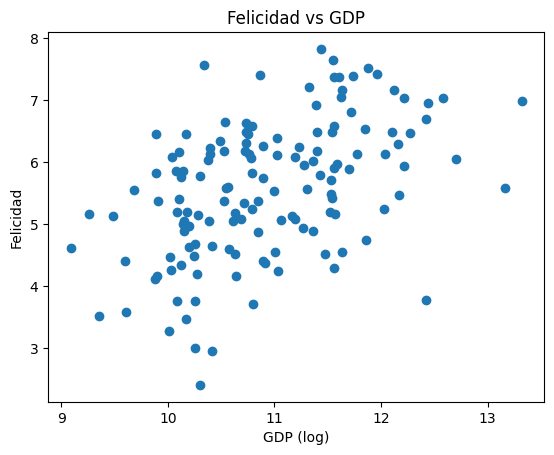

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x = np.log10(happy['GDP'])
y=happy['Felicidad']
plt.scatter(x, y)
plt.title('Felicidad vs GDP')
plt.xlabel('GDP (log)')
plt.ylabel('Felicidad')
plt.show()

De siguiente manera calcularemos los valores para Beta1 y Beta0 haciendolo paso a paso para validar los datos despues

In [14]:
xBar=x.mean()
yBar=y.mean()
B1nume=sum((x-xBar)*(y-yBar))
B1den=sum((x-xBar)**2)
B1=B1nume/B1den
B0=yBar-(B1*xBar)
print("B0=",B0)
print("B1=",B1)

B0= -1.3023500570747277
B1= 0.6281284658810408


Ya que tenemos los valores de Beta1 y Beta0 crearemos nuestra linea y la desplegaremos en la grafica.

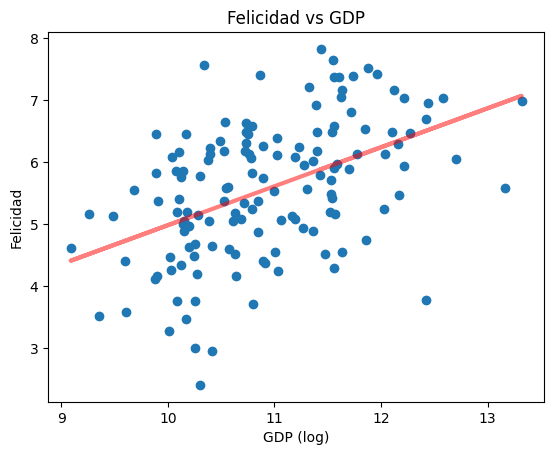

In [15]:
yHat=B0+B1*x

plt.scatter(x, y)
plt.title('Felicidad vs GDP')
plt.xlabel('GDP (log)')
plt.ylabel('Felicidad')
plt.plot(x,yHat,c="r",linewidth=3,alpha=0.5)
plt.show()


Ya que tenemos nuestra regresión lineal vamos a calcular su RSS.

In [16]:
RSS=sum((y-yHat)**2)
print("RSS=",RSS)

RSS= 131.3738317732635


Teniendo eso calcularemos el Error Estándar y el Intervalo de Confianza

In [17]:
n=len(x)
SEB1=np.sqrt(RSS/((n-2)*sum((x-xBar)**2)))
print("SEB1=",SEB1)

SEB1= 0.09983378435340727


Ahora el Coegiciente que podemos esperar esra en un promedio de 0.099.

Sigue calcular el intervalo de confianza.

In [18]:
import scipy.stats as st
per=st.t.interval(confidence= 0.95,df=n-2)[1]
CIlow=B1-per*SEB1
CIhigh=B1+per*SEB1
print("intervalo de confianza:(",CIlow,",",CIhigh,")")

intervalo de confianza:( 0.4307393313073311 , 0.8255176004547504 )


Ya que tenemos esta iformacion podemos llegar a la conclucion que el GDP del paiz SI afecta en el factor de felicidad y con la tendencia de nuestra regrecion lineal entre mas rico es un pais mas felices son sus abitantes.

Dejando eso de lado ahora calcularemos el Error Estandar Residual (RSE por sus siglas en ingles).

In [22]:
RSE=np.sqrt(RSS/(n-2))
TSS=sum((y-yBar)**2)
R2=1-RSS/TSS
print("Residual Standard Error=",RSE)
print("R^2=",R2)

Residual Standard Error= 0.9721807858537376
R^2= 0.22166361654970657


Podemos obsewrvar que nuestra R^2 esta muy lejana de el 1 lo cual representa que tiene un error muy amplio nuestra regresión comparada a los datos reales.


Ya hecho todo a mano utilisaremos la librería statsmodels.api para validar todos nuestros datos asegurandonos que esten bien.

In [25]:
import statsmodels.api as sm

model=sm.OLS(y,sm.add_constant(x))
# Ajustamos el modelo
results=model.fit()
print(results.summary())
from sklearn.linear_model import LinearRegression
# Inicializa el modelo de regresión lineal
model=LinearRegression()
# Ajusta el modelo a los datos. Recuerda cambiar el formato de x
model.fit(np.array(x).reshape(-1,1),y)
# Imprime el valor de B0
print("B0=",model.intercept_)
# Imprime el valor de B1
print("B1=",model.coef_)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        17:47:03   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2